In [51]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms, models
import time
import os
import copy
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.utils.data as Data
import numpy as np
import matplotlib.pyplot as plt
from data import microPlankton
import cv2 as cv
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from dataTransformNew_v2 import dataTran
import time
import winsound

batchSize = 32  # 11111111111
numClasses = 1
numEpoch = 300
testSize = 0.2  # 11111111111
learningRate = 0.0001  # 11111111111 0.001
dropNum = 0.5
momentum = 0.9

featureExtract = True
usePretrained = False
dropout = True
mono = True
savePreAndRealFlag = True

samplePath = 'D:/Plankton_images_database/Eastsound_2015_database/'
inputSize = 300
imgType = '.tif'
#txtFile = "eastsound_training_data.txt"  # 11111111111
txtFile = "test.txt" 
#modelName = "shufflenet_v2_x1_5" #original one used for diatoms
modelName = "vgg19" #me playing with it
filePath = "C:/automated_classification/holographic_plankton_classification-main/"
savePath = 'C:/automated_classification/holographic_plankton_classification-main/modelGen/' + modelName + '_'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# --------------------find the input size for padding START
def findMax(imgPath, fileType):
    maxPixel = 0
    for mainPath, dirs, file in os.walk(imgPath, topdown=False):
        for subFolderName in dirs:  # read subfolder
            pathNow = os.path.join(mainPath, subFolderName)
            for subMainPath, subDirs, subFile in os.walk(pathNow, topdown=False):  # find data file
                for dataFile in subFile:  # read data file
                    if os.path.splitext(dataFile)[1] == fileType:  # find data with specific suffix
                        img = cv.imread(subMainPath + '/' + dataFile)
                        try:
                            tempPixel = max(img.shape)
                        except:
                            print(dataFile)
                        maxPixel = max(tempPixel, maxPixel)
    return maxPixel


# inputSize = findMax(samplePath, imgType)
# --------------------find the input size for padding END

dataTransforms = {
    "trainData": transforms.Compose([
        # transforms.Resize(inputSize),
        # transforms.RandomCrop(size=inputSize, pad_if_needed=True, padding_mode='constant'),
        transforms.RandomHorizontalFlip(p=0.5),  # horizontal flip and 0.5 is the position
        transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(45, resample=False, expand=False,
                                              center=None),
        transforms.ToTensor(),
        # transforms.Normalize([],[])
    ]),
    "testData": transforms.Compose([
        # transforms.Resize(inputSize),
        # transforms.RandomCrop(size=inputSize, pad_if_needed=True, padding_mode='constant'),
        transforms.RandomHorizontalFlip(p=0.5),  # horizontal flip and 0.5 is the position
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(),
        # transforms.Normalize([],[])
    ])
}

imagDataset = microPlankton(root=filePath, dataTXT=txtFile, )
train_set, test_set = train_test_split(imagDataset, test_size=testSize,random_state=42)
trainSet = dataTran(inputSize,train_set, transform=dataTransforms["trainData"])
testSet = dataTran(inputSize,test_set, transform=dataTransforms["testData"])
testDataloader = torch.utils.data.DataLoader(testSet, batch_size=batchSize, shuffle=True, num_workers=0,
                                             pin_memory=True)
trainDataloader = torch.utils.data.DataLoader(trainSet, batch_size=batchSize, shuffle=True, num_workers=0,
                                              pin_memory=True)

SyntaxError: invalid syntax (dataTransformNew_v2.py, line 24)

In [4]:
print(train_set)

[(<PIL.Image.Image image mode=F size=654x2042 at 0x2A2DE709608>, 0), (<PIL.Image.Image image mode=F size=784x694 at 0x2A2CDB96288>, 0), (<PIL.Image.Image image mode=F size=784x694 at 0x2A2DE7F6988>, 0), (<PIL.Image.Image image mode=F size=774x772 at 0x2A2DE7F6D48>, 0), (<PIL.Image.Image image mode=F size=784x694 at 0x2A2DE7F6FC8>, 0), (<PIL.Image.Image image mode=F size=2048x587 at 0x2A2DE7FE448>, 0), (<PIL.Image.Image image mode=F size=993x604 at 0x2A2DE7FE6C8>, 0), (<PIL.Image.Image image mode=F size=385x337 at 0x2A2DE7FEBC8>, 0)]


In [6]:
for images,labels in trainDataloader:
            images, labels = images.to(device), labels.to(device)

c:\users\lnyman2012\appdata\local\continuum\anaconda3\envs\automated_class\lib\site-packages\torchvision\transforms\functional.py:92: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  img = torch.from_numpy(np.array(pic, np.float32, copy=False))


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


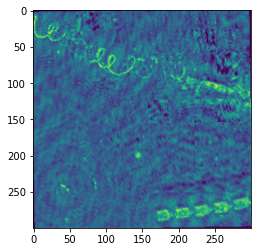

In [50]:
index = images[2].cpu().data.numpy()
print(index)
plt.imshow(index[0])
#plt.imshow(index[0].permute(2, 1, 0))